In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [18]:
df = pd.read_csv('../data/car_price_clean.csv', index_col='Unnamed: 0')
df

,CarName,carbody,drivewheel,fueltype,doornumber,cylindernumber,symboling,wheelbase,horsepower,price,carlength,carwidth,carheight,curbweight,enginesize,compressionratio,mpg_avg
0,alfa-romero giulia,convertible,1,0,2,4,3,88.6,111,13495.0,168.8,64.1,48.8,2548,130,9.0,24.0
1,alfa-romero stelvio,convertible,1,0,2,4,3,88.6,111,16500.0,168.8,64.1,48.8,2548,130,9.0,24.0
2,alfa-romero Quadrifoglio,hatchback,1,0,2,6,1,94.5,154,16500.0,171.2,65.5,52.4,2823,152,9.0,22.5
3,audi 100 ls,sedan,0,0,4,4,2,99.8,102,13950.0,176.6,66.2,54.3,2337,109,10.0,27.0
4,audi 100ls,sedan,2,0,4,5,2,99.4,115,17450.0,176.6,66.4,54.3,2824,136,8.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),sedan,1,0,4,4,-1,109.1,114,16845.0,188.8,68.9,55.5,2952,141,9.5,25.5
201,volvo 144ea,sedan,1,0,4,4,-1,109.1,160,19045.0,188.8,68.8,55.5,3049,141,8.7,22.0
202,volvo 244dl,sedan,1,0,4,6,-1,109.1,134,21485.0,188.8,68.9,55.5,3012,173,8.8,20.5
203,volvo 246,sedan,1,1,4,6,-1,109.1,106,22470.0,188.8,68.9,55.5,3217,145,23.0,26.5


In [19]:
df_2 = df[['drivewheel', 'fueltype', 'doornumber',
       'cylindernumber', 'symboling', 'wheelbase', 'horsepower', 'price',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'compressionratio', 'mpg_avg']]

<AxesSubplot:>

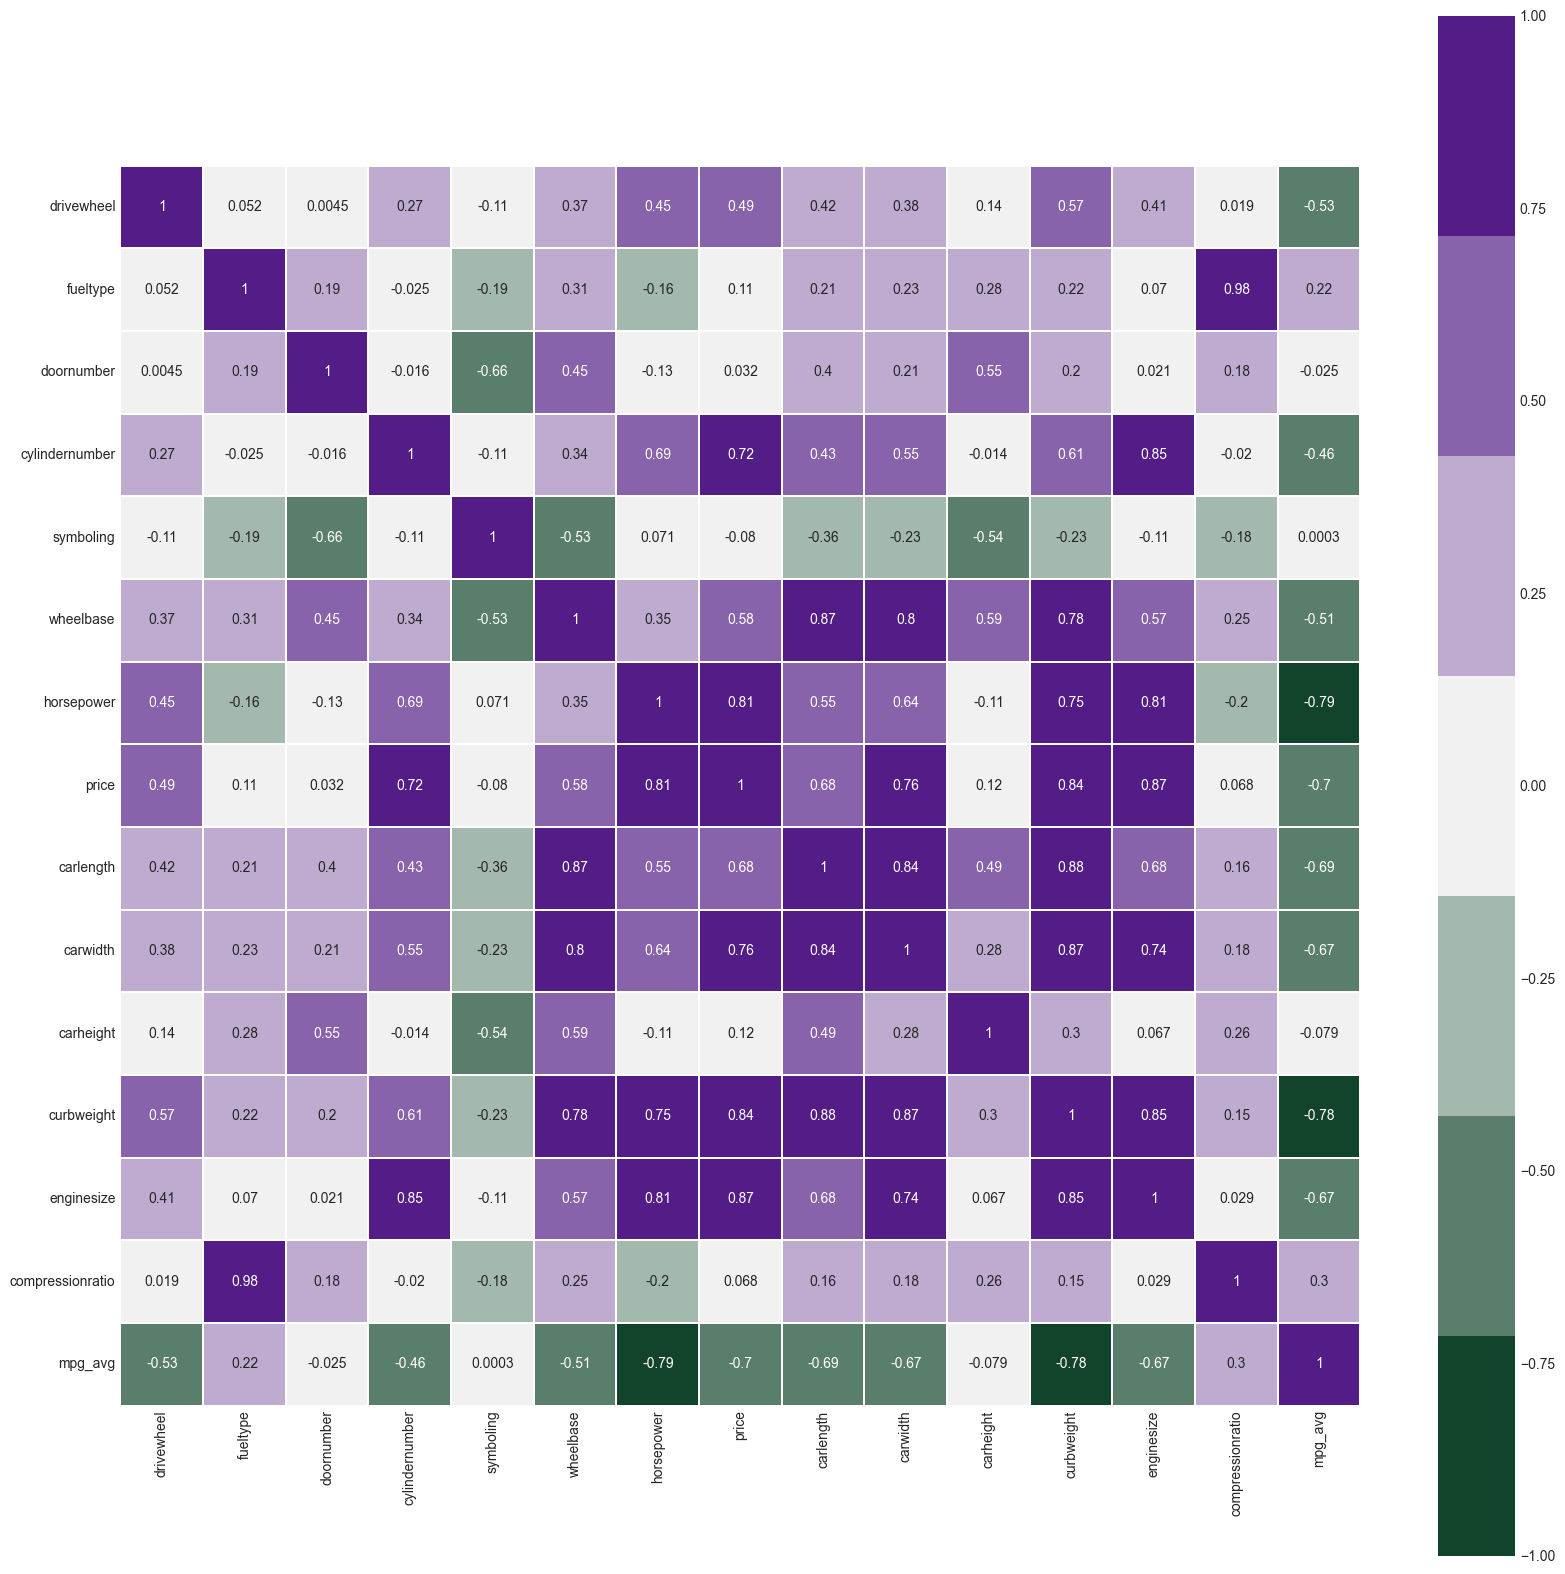

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df_2.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True)

<h1> Mostramos gráficamente si las conclusiones sacadas a partir de observar la matriz de confusión son ciertas.

In [21]:
sns.set_style("darkgrid")

1. Eliminamos las columnas de 'carwidth' y 'carheight' por su fuerte correlación con 'wheelbase', ya que el ancho de un coche está determinado por la distancia entre sus ejes.

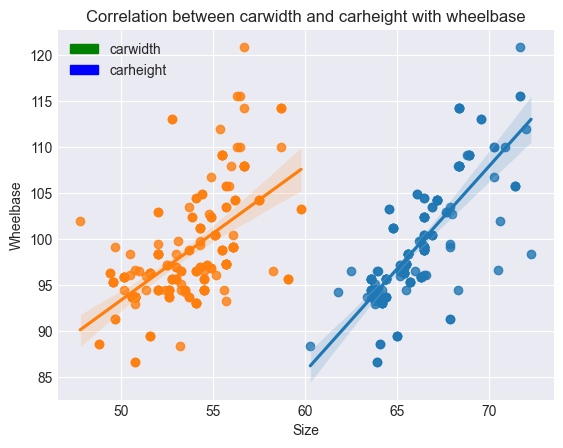

In [22]:

fig, ax= plt.subplots()
sns.regplot(data = df, x = 'carwidth', y = 'wheelbase', ax = ax)
sns.regplot(data = df, x = 'carheight', y = 'wheelbase', ax = ax)

carwidth_label = mpatches.Patch(color='green', label='carwidth')
carheight_label = mpatches.Patch(color='blue', label='carheight')
ax.legend(handles=[carwidth_label, carheight_label])

plt.title('Correlation between carwidth and carheight with wheelbase')
plt.ylabel('Wheelbase')
plt.xlabel('Size')

plt.show()

2. Dado que el numero de cilindradas (cylindernumber) repercute directamente en el tamaño del motor (enginesize), quitamos enginesize de nuestro dataset. A mayor cilindrada, mayor será el tamaño del motor.

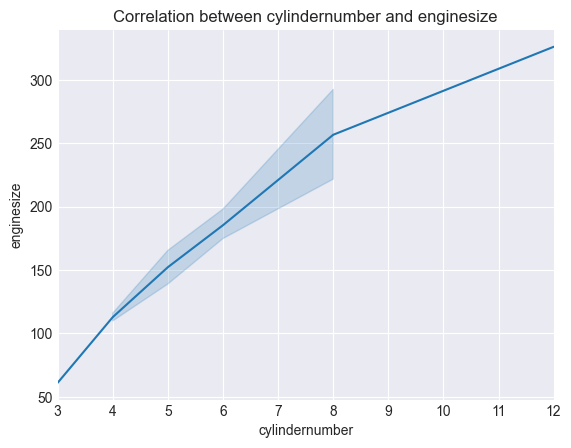

In [23]:

fig, ax= plt.subplots()
sns.lineplot(data=df, x="cylindernumber", y="enginesize", ax=ax)

ax.set_xlim(3, 12)
plt.title('Correlation between cylindernumber and enginesize')

plt.show()


3. Como la relación entre el tipo de combustible ('fueltype') y el ratio del compresor del motor ('compressionratio') está diréctamente relacionada con el tipo de combustible, quitamos la columna de 'compressionratio'.

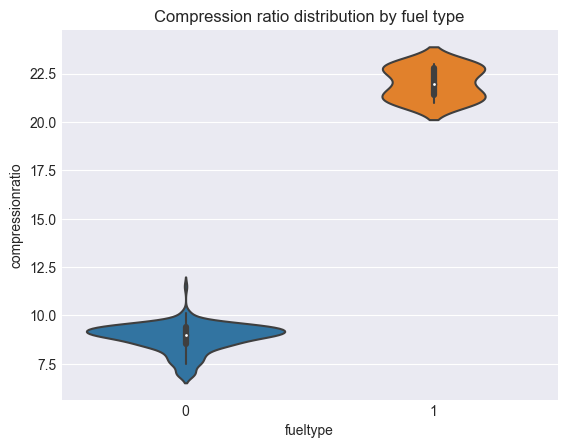

In [24]:
fig, ax= plt.subplots()
sns.violinplot(data=df, x="fueltype", y="compressionratio", ax=ax)

plt.title('Compression ratio distribution by fuel type')

plt.show()

4. Las variables 'citympg' y 'highwaympg' determinan la cantidad de combustible que se gasta por milla, (millas por galón). Ambas tienen correlaciones negativas con el peso del vehículo ('curbweight'), con el tamaño del motor ('enginesize') y con los caballos ('horsepower').
Además se observa correlación negativa con el precio y podemos deducir que a menor gasto de combustible por milla menor será el precio final de un vehículo.

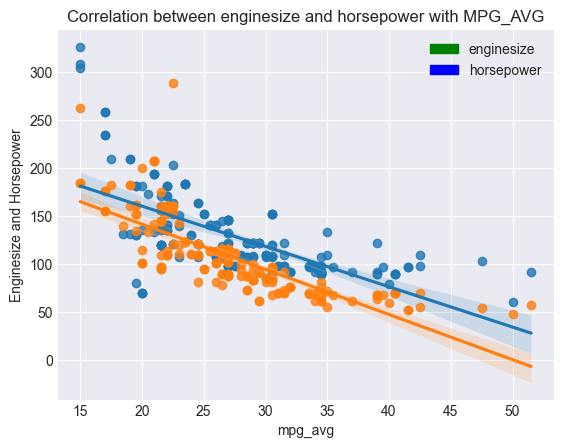

In [25]:
fig, ax= plt.subplots()
sns.regplot(data=df, x="mpg_avg", y="enginesize", ax=ax)
sns.regplot(data=df, x="mpg_avg", y="horsepower", ax=ax)

enginesize_label = mpatches.Patch(color='green', label='enginesize')
horsepower_label = mpatches.Patch(color='blue', label='horsepower')
ax.legend(handles=[enginesize_label, horsepower_label])

plt.title('Correlation between enginesize and horsepower with MPG_AVG')
plt.ylabel('Enginesize and Horsepower')

plt.show()

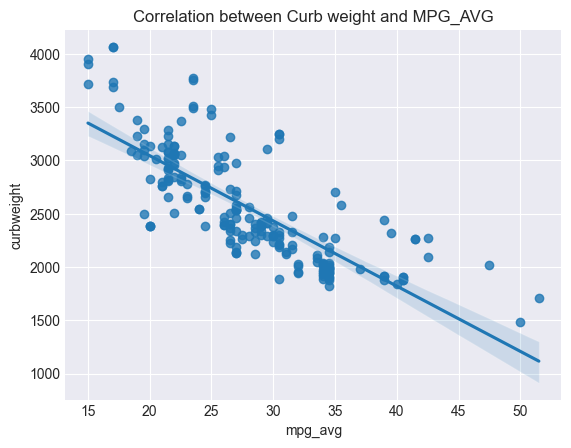

In [26]:
fig, ax= plt.subplots()
sns.regplot(data=df, x="mpg_avg", y="curbweight", ax=ax)

plt.title('Correlation between Curb weight and MPG_AVG')


plt.show()

6. Observamos una correlación negativa entre el número de puerta y Symboling.
Symboling indica de forma ascendente el nivel de riegos al asegurar un coche.
Para asegurar un coche, las aseguradoras tiene una cláusula que a menor número de puertas más cuesta asegurar un vehículo.

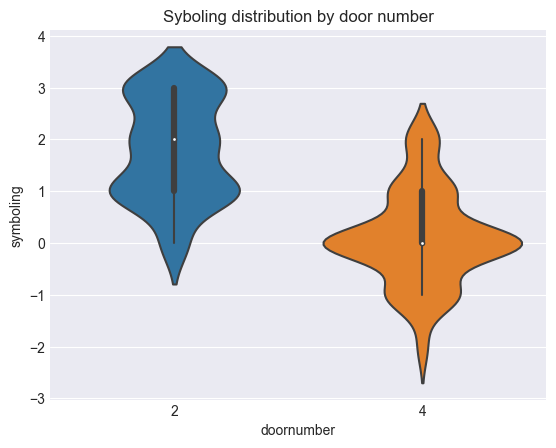

In [27]:
fig, ax= plt.subplots()

sns.violinplot(data=df, y="symboling", x="doornumber", ax=ax)

plt.title('Syboling distribution by door number')


plt.show()

Podemos afirmar que el número de puertas está directamente relacionado con la variable symboling, tal y como se puede contrastar en el siguiente arículo.

Relación numero de puertas mayor prima en el seguro:
https://www.mapfre.es/particulares/seguros-de-coche/articulos/numero-de-puertas-afecta-precio-seguro/


<h1> Distribución de nuestros datos <h1>

<h3> Distribución de fueltype

gasolina: 185
diesel: 20


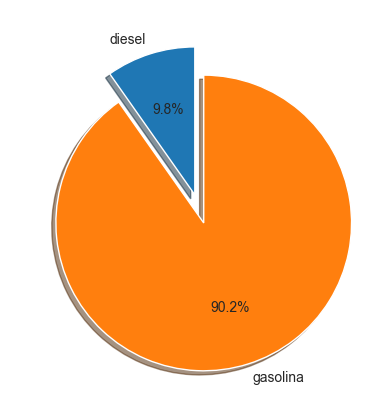

In [28]:
diesel = len(df[df["fueltype"] == 1])
gasolina = len(df[df["fueltype"] == 0])

labels = 'diesel','gasolina'
sizes = [diesel, gasolina]

plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots()

ax.pie(sizes, explode=(0, 0.2), 
       labels=labels, 
       autopct='%1.1f%%',
       shadow=True, 
       startangle=90)

print('gasolina:',gasolina)
print('diesel:',diesel)

plt.show()

Dado que la distribución del tipo de combustible está desbalanceada, aunque esta tuviera una fuerte correlación con nuestra variable target, no podríamos tenerla en cuenta ya que podría afectar negativamente al análisis final.

<h3>Distribución de precios

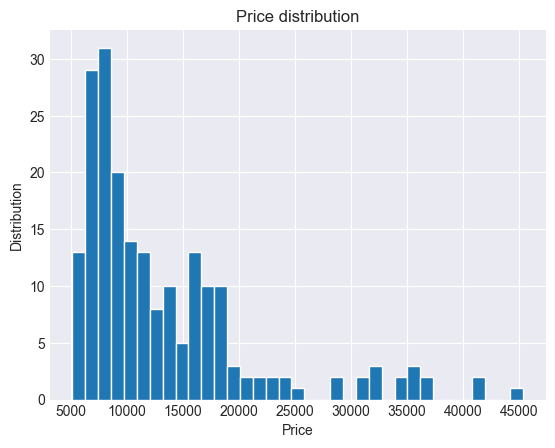

In [29]:
plt.hist(df['price'], bins = 35)

plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Distribution')

plt.show()

Vemos una gran concentración en la distribución de nuestros precios entre 6.000€ y 10.000€, por lo que podemos afirmar que nuestro dataset contiene mayormente vehículos de gama media.

Al tener pocos registros de coches caros, determinar las características que hacen que un coche tenga un precio más elevado que otro no es fiable del todo, ya que si tuvieramos registros de ambos rangos de precios podríamos determinar con mayor precisión si; las variables que hemos tomado en cuenta tiene relación o no con el precio.

<h3>Distribución de MPG

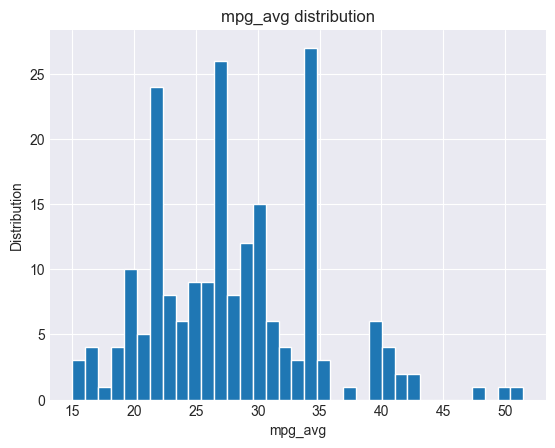

In [30]:
plt.hist(df['mpg_avg'], bins = 35)

plt.title('mpg_avg distribution')
plt.xlabel('mpg_avg')
plt.ylabel('Distribution')

plt.show()

Observamos una distribución anormal en la variable mpg_avg.
Esto puede deberse a que, por lo que hemos podido analizar previamente, nuestros datos están desbalanceados en muchas de sus columnas.

Probablemente los datos de esta fuente no sean fiables y no hayan sido recopilados de forma coherente.

Estas anomalías se deben, en parte, a la falta de registros.

<h3> Distribución de tipos de coche

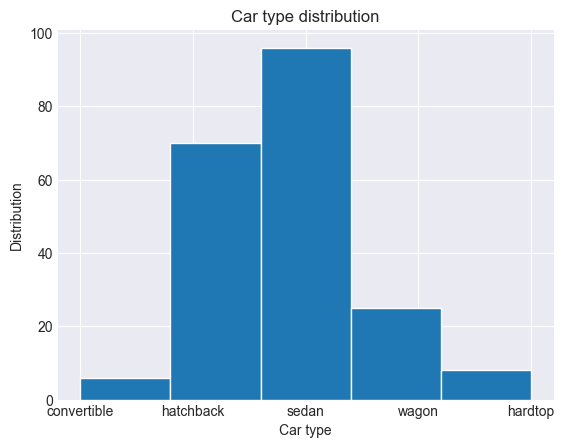

In [31]:
plt.hist(df['carbody'], bins = 5)

plt.title('Car type distribution')
plt.xlabel('Car type')
plt.ylabel('Distribution')

plt.show()

Se advierte una distribución normal en el tipo de coche.
Esto contrasta con el artículo referenciado en la bibliografía (¿Cuáles son los diferentes tipos de coches? - Onroad), en cual se afirma que el tipo de coche más común es el tipo berlina, también conocida como sedán dentro del mercado.

<h3> Compression ratio distribution

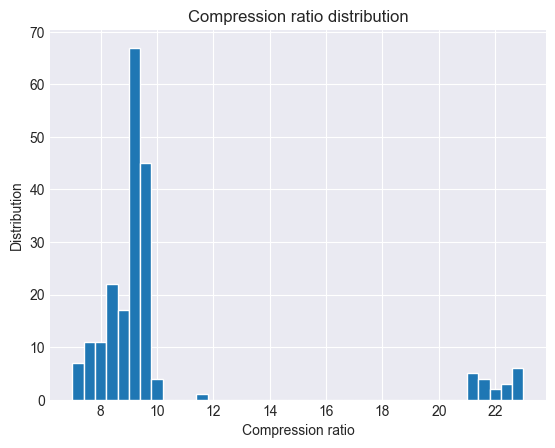

In [32]:
plt.hist(df['compressionratio'], bins = 40)

plt.title('Compression ratio distribution')
plt.xlabel('Compression ratio')
plt.ylabel('Distribution')

plt.show()

Esta distribución es interesante, ya que refleja perfectamente la relación entre el tipo de combustible y el ratio de compresión.

Podemos observar que a la derecha se encuentran los vehículos de diesel y a la izquierda los de gasolina.

La baja distribución de los ratios superiores se explica por la falta de registros de vehículos de diesel.